In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv("netflix1.csv")

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.shape

(8790, 10)

In [5]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

<AxesSubplot:>

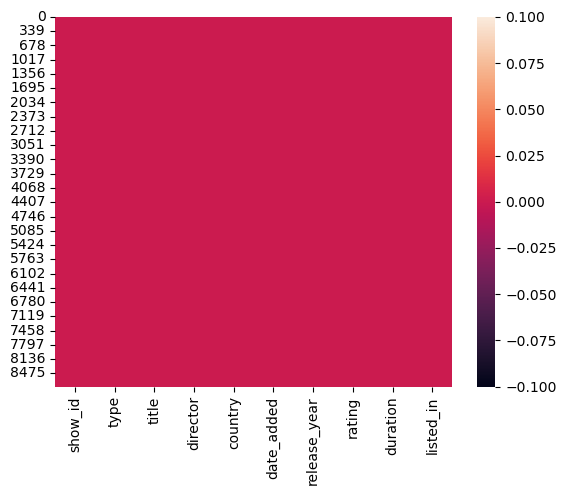

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [8]:
df.duplicated(["type","title","release_year"]).sum()

3

In [9]:
duplicate_rows = df[df.duplicated(["type","title","release_year"], keep = False)]
duplicate_rows

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
2925,s3963,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"
3285,s4523,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,3/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"
8785,s3997,TV Show,09-Feb,Anonymous,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
8786,s5965,TV Show,09-Feb,Anonymous,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"


In [10]:
rows_to_keep = duplicate_rows[["type","title","release_year"]].duplicated(keep='first')
rows_to_keep

2925    False
3285    False
4260     True
4261     True
8785    False
8786     True
dtype: bool

In [11]:
indexes_to_drop = duplicate_rows[~rows_to_keep].index
indexes_to_drop

Int64Index([2925, 3285, 8785], dtype='int64')

In [12]:
df = df.drop(indexes_to_drop)

In [13]:
duplicate_rows = df[df.duplicated(["type","title","release_year"], keep = False)]
duplicate_rows

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


In [14]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8784,s2667,TV Show,#blackAF,Anonymous,United States,4/17/2020,2020,TV-MA,1 Season,TV Comedies
8786,s5965,TV Show,09-Feb,Anonymous,Pakistan,3/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
8787,s4052,Movie,"2,215",Nottapon Boonprakob,Thailand,01/03/2019,2018,TV-MA,89 min,"Documentaries, International Movies, Sports Mo..."
8788,s4351,TV Show,1983,Anonymous,Poland,11/30/2018,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"


In [15]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%m/%d/%Y')
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')
df['release_year'] = df['release_year'].dt.year

In [16]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8784,s2667,TV Show,#blackAF,Anonymous,United States,2020-04-17,2020,TV-MA,1 Season,TV Comedies
8786,s5965,TV Show,09-Feb,Anonymous,Pakistan,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
8787,s4052,Movie,"2,215",Nottapon Boonprakob,Thailand,2019-01-03,2018,TV-MA,89 min,"Documentaries, International Movies, Sports Mo..."
8788,s4351,TV Show,1983,Anonymous,Poland,2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"


In [17]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [18]:
df['title'] = df['title'].astype(str)

In [19]:
pattern = r'^[A-Z][\w\s]+$'  # Regular expression pattern for correct title format
is_correct_title = df['title'].str.contains(pattern, regex=True, na=False)

In [20]:
incorrect_titles = df[~is_correct_title]
incorrect_titles

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
10,s941,Movie,Motu Patlu: Deep Sea Adventure,Suhas Kadav,India,2021-01-05,2014,TV-Y7,76 min,"Children & Family Movies, Comedies"
11,s942,Movie,Motu Patlu: Mission Moon,Suhas Kadav,India,2021-01-05,2013,TV-Y7,71 min,"Children & Family Movies, Comedies"
12,s1774,TV Show,Zumbo's Just Desserts,Anonymous,Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV"
13,s471,Movie,Bridgerton - The Afterparty,"Krysia Plonka, Kristian Mercado",United States,2021-07-13,2021,TV-14,39 min,Movies
14,s730,Movie,Bling Empire - The Afterparty,"Krysia Plonka, Kristian Mercado",United States,2021-12-06,2021,TV-MA,36 min,Movies
...,...,...,...,...,...,...,...,...,...,...
8784,s2667,TV Show,#blackAF,Anonymous,United States,2020-04-17,2020,TV-MA,1 Season,TV Comedies
8786,s5965,TV Show,09-Feb,Anonymous,Pakistan,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
8787,s4052,Movie,"2,215",Nottapon Boonprakob,Thailand,2019-01-03,2018,TV-MA,89 min,"Documentaries, International Movies, Sports Mo..."
8788,s4351,TV Show,1983,Anonymous,Poland,2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8787 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8787 non-null   object        
 1   type          8787 non-null   object        
 2   title         8787 non-null   object        
 3   director      8787 non-null   object        
 4   country       8787 non-null   object        
 5   date_added    8787 non-null   datetime64[ns]
 6   release_year  8787 non-null   int64         
 7   rating        8787 non-null   object        
 8   duration      8787 non-null   object        
 9   listed_in     8787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.1+ KB


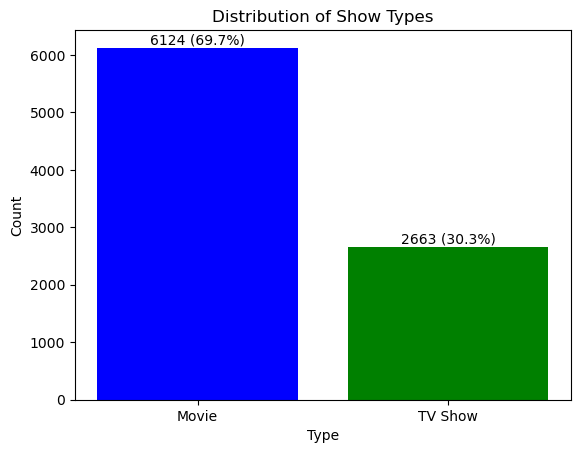

In [22]:
type_counts = df['type'].value_counts()

colors = ['blue', 'green']

total_count = sum(type_counts.values)
percentages = [(count / total_count) * 100 for count in type_counts.values]

plt.bar(type_counts.index, type_counts.values, color=colors)

for i, (count, percentage) in enumerate(zip(type_counts.values, percentages)):
    plt.text(i, count, f'{count} ({percentage:.1f}%)', ha='center', va='bottom')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Show Types')

plt.show()

In [23]:
country_type_counts = df.groupby(['country', 'type']).size().unstack()
country_type_counts

type,Movie,TV Show
country,,
Anonymous,257.0,30.0
Argentina,56.0,20.0
Australia,61.0,53.0
Austria,8.0,1.0
Bangladesh,3.0,NaN
...,...,...
Uruguay,8.0,1.0
Venezuela,2.0,NaN
Vietnam,7.0,NaN


In [24]:
top_10_countries = country_type_counts.sum(axis=1).nlargest(10).index
top_10_countries

Index(['United States', 'India', 'United Kingdom', 'Pakistan', 'Anonymous',
       'Canada', 'Japan', 'South Korea', 'France', 'Spain'],
      dtype='object', name='country')

In [25]:
country_type_counts_top_10 = country_type_counts.loc[top_10_countries]
country_type_counts_top_10

type,Movie,TV Show
country,,
United States,2395.0,845.0
India,975.0,81.0
United Kingdom,387.0,251.0
Pakistan,71.0,349.0
Anonymous,257.0,30.0
Canada,187.0,84.0
Japan,87.0,172.0
South Korea,49.0,165.0
France,148.0,65.0


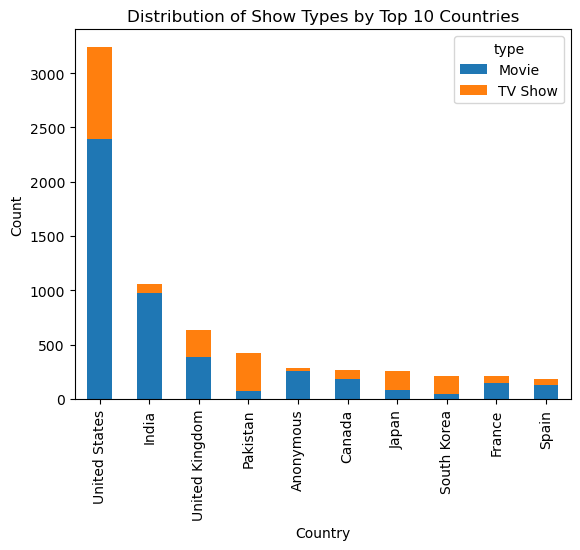

In [26]:
country_type_counts_top_10.plot(kind='bar', stacked=True)

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Show Types by Top 10 Countries')

plt.show()

In [27]:
movie_counts = df[df['type'] == 'Movie']['release_year'].value_counts().sort_index()
movie_counts

1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    765
2018    766
2019    632
2020    517
2021    277
Name: release_year, Length: 73, dtype: int64

In [28]:
tv_show_counts = df[df['type'] == 'TV Show']['release_year'].value_counts().sort_index()
tv_show_counts

1925      1
1945      1
1946      1
1963      1
1967      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      3
1993      4
1994      2
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      5
2002      7
2003      8
2004      9
2005     13
2006     14
2007     14
2008     22
2009     34
2010     39
2011     40
2012     63
2013     61
2014     88
2015    159
2016    243
2017    265
2018    378
2019    397
2020    436
2021    315
Name: release_year, dtype: int64

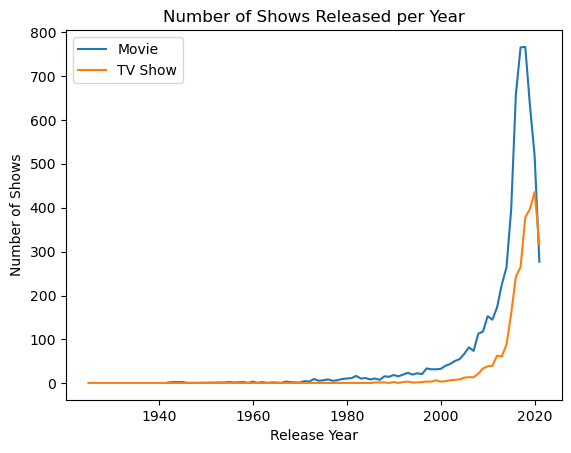

In [29]:
plt.plot(movie_counts.index, movie_counts.values, label='Movie')
plt.plot(tv_show_counts.index, tv_show_counts.values, label='TV Show')

plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Number of Shows Released per Year')
plt.legend()

plt.show()

In [30]:
genre_type_counts = df.groupby(['listed_in', 'type']).size().unstack()
genre_type_counts

type,Movie,TV Show
listed_in,,
Action & Adventure,128.0,NaN
"Action & Adventure, Anime Features",1.0,NaN
"Action & Adventure, Anime Features, Children & Family Movies",4.0,NaN
"Action & Adventure, Anime Features, Classic Movies",2.0,NaN
"Action & Adventure, Anime Features, Horror Movies",1.0,NaN
...,...,...
"TV Horror, TV Mysteries, Teen TV Shows",NaN,1.0
"TV Horror, Teen TV Shows",NaN,2.0
"TV Sci-Fi & Fantasy, TV Thrillers",NaN,1.0


In [31]:
top_10_genre = genre_type_counts.sum(axis=1).nlargest(10).index
top_10_genre

Index(['Dramas, International Movies', 'Documentaries', 'Stand-Up Comedy',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', 'Kids' TV',
       'Children & Family Movies', 'Children & Family Movies, Comedies',
       'Documentaries, International Movies',
       'Dramas, International Movies, Romantic Movies'],
      dtype='object', name='listed_in')

In [32]:
genre_type_counts_top_10 = genre_type_counts.loc[top_10_genre]
genre_type_counts_top_10

type,Movie,TV Show
listed_in,,
"Dramas, International Movies",362.0,NaN
Documentaries,359.0,NaN
Stand-Up Comedy,334.0,NaN
"Comedies, Dramas, International Movies",274.0,NaN
"Dramas, Independent Movies, International Movies",252.0,NaN
Kids' TV,NaN,219.0
Children & Family Movies,215.0,NaN
"Children & Family Movies, Comedies",201.0,NaN
"Documentaries, International Movies",186.0,NaN


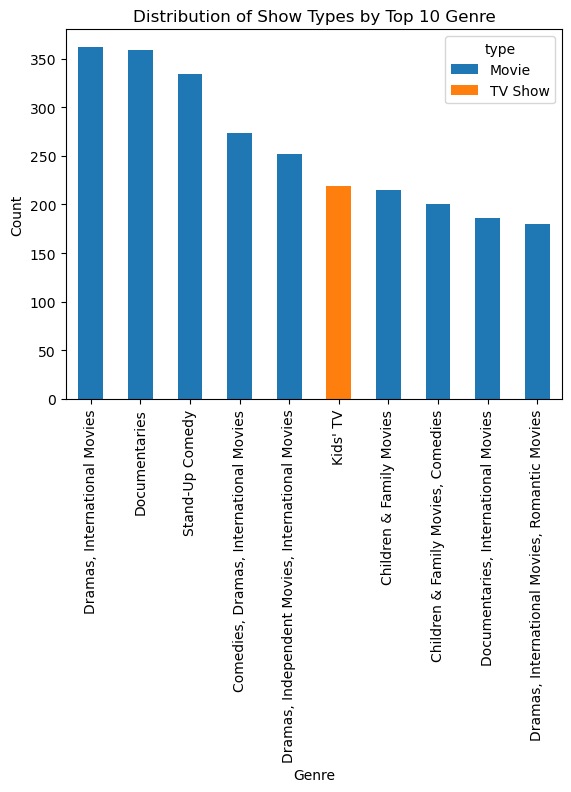

In [33]:
genre_type_counts_top_10.plot(kind='bar', stacked=True)

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Show Types by Top 10 Genre')

plt.show()

In [34]:
dir_type_counts = df.groupby(['director', 'type']).size().unstack()
dir_type_counts

type,Movie,TV Show
director,,
A. L. Vijay,2.0,NaN
A. Raajdheep,1.0,NaN
A. Salaam,1.0,NaN
A.R. Murugadoss,2.0,NaN
Aadish Keluskar,1.0,NaN
...,...,...
Çagan Irmak,1.0,NaN
Ísold Uggadóttir,1.0,NaN
Óskar Thór Axelsson,1.0,NaN


In [35]:
top_10_dir = dir_type_counts.sum(axis=1).nlargest(10).index
top_10_dir

Index(['Anonymous', 'Rajiv Chilaka', 'Alastair Fothergill',
       'Raúl Campos, Jan Suter', 'Marcus Raboy', 'Suhas Kadav', 'Jay Karas',
       'Cathy Garcia-Molina', 'Jay Chapman', 'Martin Scorsese'],
      dtype='object', name='director')

In [36]:
dir_type_counts_top_10 = dir_type_counts.loc[top_10_dir]
dir_type_counts_top_10

type,Movie,TV Show
director,,
Anonymous,173.0,2414.0
Rajiv Chilaka,19.0,1.0
Alastair Fothergill,4.0,14.0
"Raúl Campos, Jan Suter",18.0,NaN
Marcus Raboy,15.0,1.0
Suhas Kadav,16.0,NaN
Jay Karas,14.0,NaN
Cathy Garcia-Molina,13.0,NaN
Jay Chapman,12.0,NaN


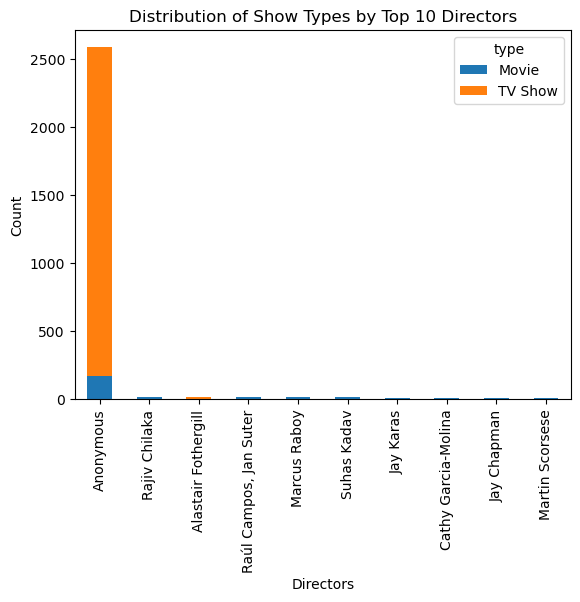

In [37]:
dir_type_counts_top_10.plot(kind='bar', stacked=True)

plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Distribution of Show Types by Top 10 Directors')

plt.show()

In [38]:
rating_counts = df['rating'].value_counts()
rating_counts

TV-MA       3205
TV-14       2155
TV-PG        861
R            798
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

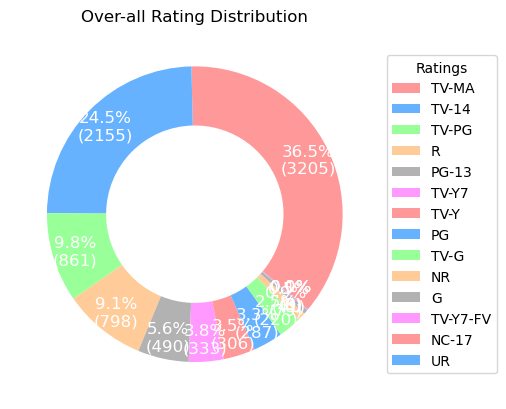

In [39]:
fig, ax = plt.subplots()

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#B2B2B2', '#FF99FF']
wedges, text, autotexts = ax.pie(rating_counts, colors=colors, wedgeprops=dict(width=0.4), startangle=-40,
                                 autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 12})
ax.legend(wedges, rating_counts.index, title='Ratings', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax.set(aspect="equal", title='Over-all Rating Distribution')

label_format = '{:.1f}%\n({})'
for i, autotext in enumerate(autotexts):
    autotext.set_text(label_format.format(rating_counts[i] / sum(rating_counts) * 100, rating_counts[i]))
    autotext.set_color('white')

plt.show()

In [40]:
movie_df = df[df['type'] == 'Movie']
rating_counts_movie = movie_df['rating'].value_counts()
rating_counts_movie

TV-MA       2062
TV-14       1426
R            796
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

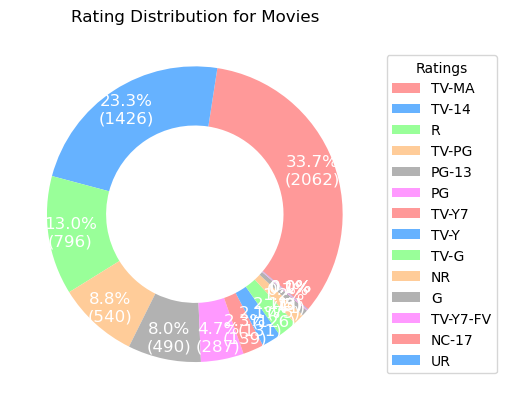

In [41]:
fig, ax = plt.subplots()
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#B2B2B2', '#FF99FF']
wedges, text, autotexts = ax.pie(rating_counts_movie, colors=colors, wedgeprops=dict(width=0.4), startangle=-40,
                                 autopct='%1.1f%%',  pctdistance=0.85, textprops={'fontsize': 12})

ax.legend(wedges, rating_counts_movie.index, title='Ratings', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax.set(aspect="equal", title='Rating Distribution for Movies')

label_format = '{:.1f}%\n({})'
for i, autotext in enumerate(autotexts):
    autotext.set_text(label_format.format(rating_counts_movie[i] / sum(rating_counts_movie) * 100, rating_counts_movie[i]))
    autotext.set_color('white')

plt.show()

In [42]:
TV_df = df[df['type'] == 'TV Show']
rating_counts_TV = TV_df['rating'].value_counts()
rating_counts_TV

TV-MA       1143
TV-14        729
TV-PG        321
TV-Y7        194
TV-Y         175
TV-G          94
NR             4
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

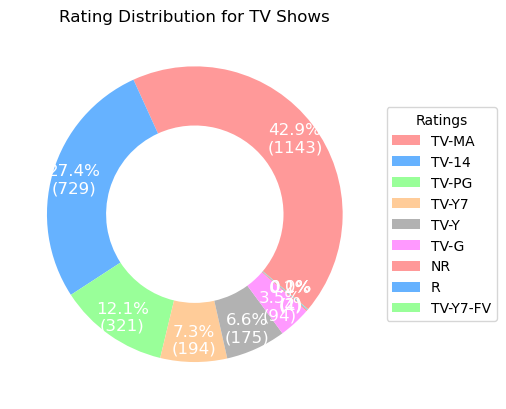

In [43]:
fig, ax = plt.subplots()
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#B2B2B2', '#FF99FF']
wedges, text, autotexts = ax.pie(rating_counts_TV, colors=colors, wedgeprops=dict(width=0.4), startangle=-40,
                                 autopct='%1.1f%%',  pctdistance=0.85, textprops={'fontsize': 12})

ax.legend(wedges, rating_counts_TV.index, title='Ratings', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax.set(aspect="equal", title='Rating Distribution for TV Shows')

label_format = '{:.1f}%\n({})'
for i, autotext in enumerate(autotexts):
    autotext.set_text(label_format.format(rating_counts_TV[i] / sum(rating_counts_TV) * 100, rating_counts_TV[i]))
    autotext.set_color('white')

plt.show()